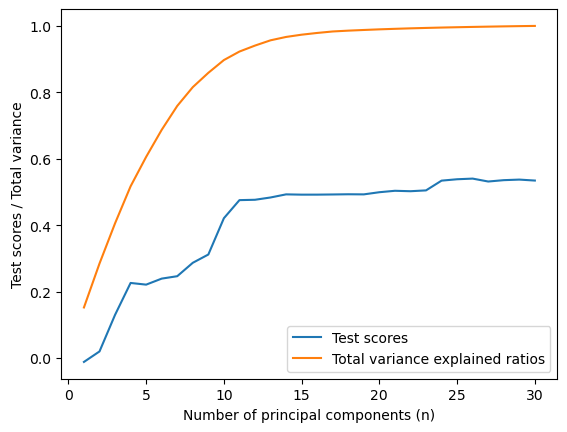

In [1]:
# Question 3a
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

import matplotlib.pyplot as plt

X, y = make_regression(n_samples=500, n_features=30, n_informative=20,
                       effective_rank=10, noise=4, tail_strength=0.1,
                       random_state=42)

#train_test_split will also shuffle dataset by default.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# print(X.shape) or
# print(X_train.shape)

ns = range(1, X.shape[1] + 1)
scores = []
variances = []

for n in ns:
    pipe = make_pipeline(StandardScaler(), PCA(n), LinearRegression())
    pipe.fit(X_train, y_train)
    score = pipe.score(X_test, y_test)
    scores.append(score)
    sum_variance = sum(pipe['pca'].explained_variance_ratio_)
    variances.append(sum_variance)

plt.plot(ns, scores, label="Test scores")
plt.plot(ns, variances, label="Total variance explained ratios")
plt.xlabel("Number of principal components (n)")
plt.ylabel("Test scores / Total variance")
plt.legend()
# Remove the redundant datatype msg
plt.show() 

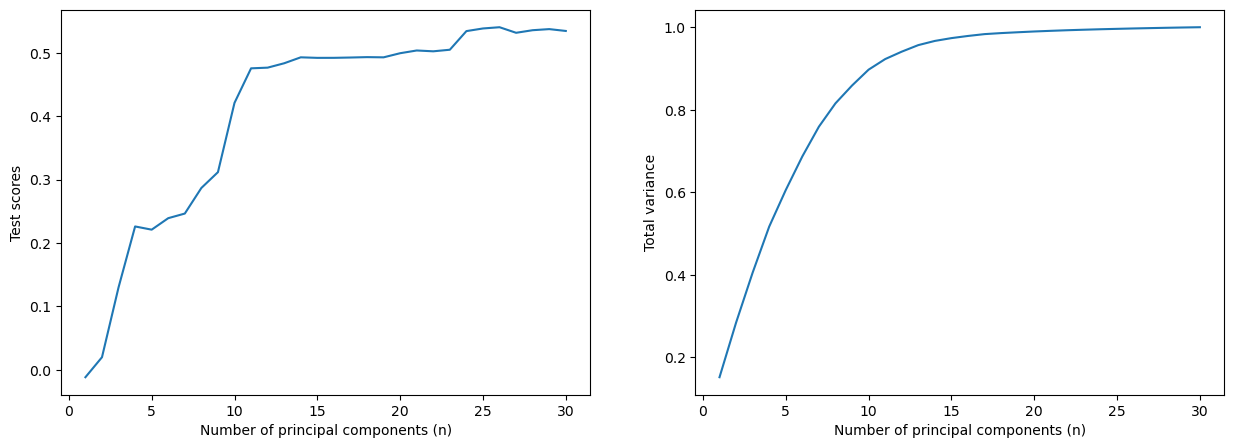

In [2]:
# Remarks Q3a
# Since test scores (-infiinity to 1] and total variance is from 0 to 1 are in different ranges
# I prefer to split them into separated graphs.
plt.figure(figsize=[15,5])
plt.subplot(1, 2, 1)
plt.xlabel("Number of principal components (n)")
plt.ylabel("Test scores")
plt.plot(ns, scores)

plt.subplot(1, 2, 2)
plt.xlabel("Number of principal components (n)")
plt.ylabel("Total variance")
plt.plot(ns, variances)
plt.show()

<Axes: xlabel='pc_0', ylabel='pc_1'>

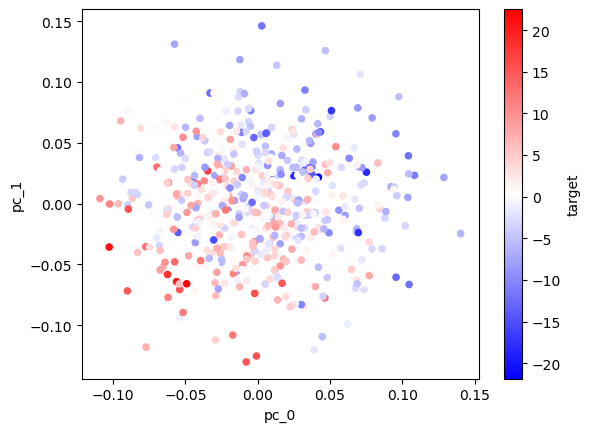

In [3]:
# Question 3b
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=500, n_features=30, n_informative=20,
                       effective_rank=10, noise=4, tail_strength=0.1,
                       random_state=42)
pca = PCA(2)
X_pca = pca.fit_transform(X)
df = pd.DataFrame(X_pca, columns=("pc_0", "pc_1"))

df['target'] = y
df.plot.scatter(x="pc_0", y="pc_1", c="target", colormap="bwr")

In [4]:
# Question 3c
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
import pandas as pd

dataset = [
            ["apple", "bread", "egg", "fish"],
            ["apple", "bread", "carrot", "donut", "egg"],
            ["bread", "egg"],
            ["bread", "donut", "egg"],
            ["apple", "bread", "egg"],
            ["apple", "bread", "egg", "fish"],
            ["apple", "carrot", "donut", "egg"]    
            ]

encoder = TransactionEncoder()
encoded_data = encoder.fit_transform(dataset)
df = pd.DataFrame(encoded_data, columns=encoder.columns_)
apriori(df, min_support=0.4, use_colnames=True)

,support,itemsets
0,0.714286,(apple)
1,0.857143,(bread)
2,0.428571,(donut)
3,1.000000,(egg)
4,0.571429,"(bread, apple)"
5,0.714286,"(apple, egg)"
6,0.857143,"(bread, egg)"
7,0.428571,"(donut, egg)"
8,0.571429,"(bread, apple, egg)"


In [5]:
# Question 4a
import numpy as np
from sklearn.cluster import KMeans

points = np.array([[1, 1], [1, 2], [1, 3], [2, 1], [2, 2], [4, 3]])
init_centroids = np.array([[1, 0], [2, 2]])

kmeans = KMeans(n_clusters=2, init=init_centroids, n_init=1)
kmeans.fit(points)

print(kmeans.labels_)
print(kmeans.cluster_centers_)
print(kmeans.n_iter_)
print(kmeans.inertia_)

[0 0 1 0 1 1]
[[1.33333333 1.33333333]
 [2.33333333 2.66666667]]
3
6.666666666666668


(0.0, 5.0)

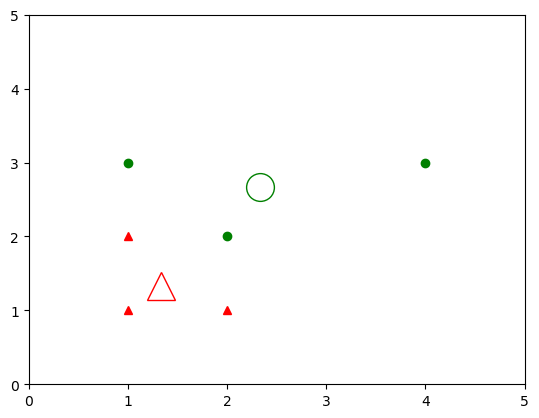

In [6]:
# Draft on Question 4b
# Draw the graph to find another 'style' of clusters

import matplotlib.pyplot as plt
markers = ("^r", "og")
for i, centroid in enumerate(kmeans.cluster_centers_):
    plt.plot(centroid[0], centroid[1], markers[i], markersize=20, markerfacecolor='w')
    cluster_points = points[kmeans.labels_ == i]
    plt.plot(cluster_points[:, 0], cluster_points[:, 1], markers[i])
    
plt.xlim(0, 5)
plt.ylim(0, 5)

##### Question 4b
From the graph we can see that basically there are five points sitting close to each other and the rest one, i.e. (4, 3) is further away from the rest of five points. A good k-mean algorithm should group the five points with a cluster and the rest one in another cluster. 

In Question 4a we cannot acheive the observed results and we may need to adjust our initial centroid of cluster C0 and cluster C1.

During iterations, the cluster C0 moves from (1, 0) to (1.33, 1.33) and that of C1 moves from (2, 2) to (2.33, 2.67), a little shift to the northeast direction.

We can get a different results of cluster labels and centroid by moving upward the initial centroid cluster C0 and shifting the initial centroid of cluster C1 to the right. 

For example, initial centroid of cluster C0 is (1, 2) and initial centroid of cluster C1 is (3, 3).
Then through the iterations, the trend is that cluster C0 will be closer to the five points and cluster C1 is only closer to (4,3).

In [7]:
import numpy as np
from sklearn.cluster import KMeans

points = np.array([[1, 1], [1, 2], [1, 3], [2, 1], [2, 2], [4, 3]])
init_centroids = np.array([[1, 2], [3, 3]])

kmeans = KMeans(n_clusters=2, init=init_centroids, n_init=1)
kmeans.fit(points)

print("Cluster labels: ", kmeans.labels_)
print("Cluster centroids: \n", kmeans.cluster_centers_)

Cluster labels:  [0 0 0 0 0 1]
Cluster centroids: 
 [[1.4 1.8]
 [4.  3. ]]


Text(0, 0.5, 'Silhouette coefficient')

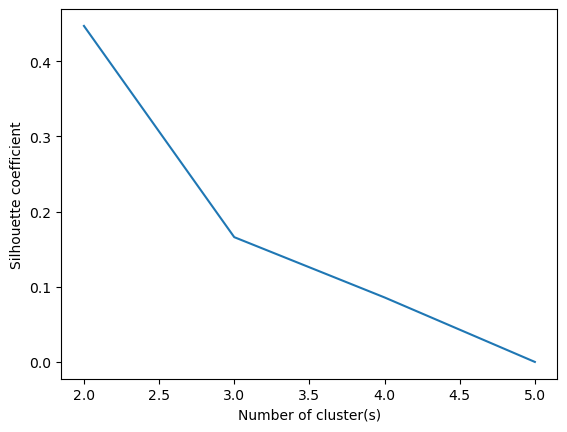

In [8]:
# Question 4c
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

points = np.array([[1, 1], [1, 2], [1, 3], [2, 1], [2, 2], [4, 3]])

# 2 to 5 clusters
ns = range(2, 6)
silhouettes = []

for n in ns:
    agglo = AgglomerativeClustering(n_clusters=n)
    agglo.fit(points)
    silhouette = silhouette_score(points, agglo.labels_)
    silhouettes.append(silhouette)

# plt.xticks(ns)
# To show x-axis in integer(s) only, optional
plt.plot(ns, silhouettes)
plt.xlabel("Number of cluster(s)")
plt.ylabel("Silhouette coefficient")

##### Question 4d
From the resulting graph, the optimal number of clusters for the dataset is 2, since it has the greatest silhouette coefficient.